The exponential distribution
-------------------

CDF(x) = 1 − e−λx

The parameter, λ, determines the shape of the distribution

In [1]:
# example 

import numpy as np

sample = sorted(np.random.random(size=20)*10)

In [2]:
import math
def cdf_exp(sample,lam):
    y = []
    for x in sample:
        y.append(1-math.exp(-lam*x))
    return y
y1 = cdf_exp(sample,0.5)
y2 = cdf_exp(sample,1)
y3 = cdf_exp(sample,2)

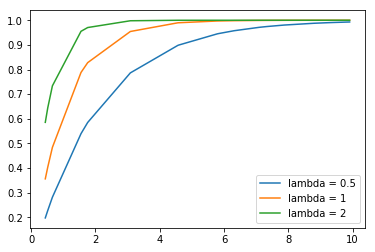

In [4]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots()
ax.plot(sample,y1,label='lambda = 0.5')
ax.plot(sample,y2,label='lambda = 1')
ax.plot(sample,y3,label='lambda = 2')
ax.legend()
plt.show()

In the real world, exponential distributions come up when we look at a series
of events and **measure the times between events**, called interarrival times.
If the events are equally likely to occur at any time, **the distribution of
interarrival times tends to look like an exponential distribution**

In [17]:
import pandas as pd
df = pd.read_csv('babyboom.csv')

In [18]:
df.head()

,time,sex,wgt_gms,minutes
0,5.0,1.0,3837.0,5.0
1,NaN,NaN,NaN,NaN
2,104.0,1.0,3334.0,64.0
3,NaN,NaN,NaN,NaN
4,118.0,2.0,3554.0,78.0


In [19]:
df = df.dropna()

In [20]:
df.head()

,time,sex,wgt_gms,minutes
0,5.0,1.0,3837.0,5.0
2,104.0,1.0,3334.0,64.0
4,118.0,2.0,3554.0,78.0
6,155.0,2.0,3838.0,115.0
8,257.0,2.0,3625.0,177.0


In [21]:
df.columns = ['time','sex','wgt_gms','minutes']

In [22]:
diff = df.minutes.diff() # diff is the difference between the consecutive times
type(diff)

pandas.core.series.Series

In [23]:
def eval_cdf(value,series):
    count =0
    for x in series:
        if x <= value:
            count += 1
    return count/len(series)

def compute_cdf(series):
    x = sorted(series)
    y = []
    for value in x:
        y.append(eval_cdf(value,x))
    return x,y

the complementary CDF, which is 1 − CDF(x), on a
log-y scale. For data from an exponential distribution, the result is a straight
line.

In [51]:
x,y = compute_cdf(diff)

import math
def return_ccdf(y):
    log_y = []
    for value in y:
        if value>0:
            log_y.append(math.log(1-value))
        else:
            log_y.append(0)
    return log_y
log_y = return_ccdf(y)

Text(0,0.5,'CCDF')

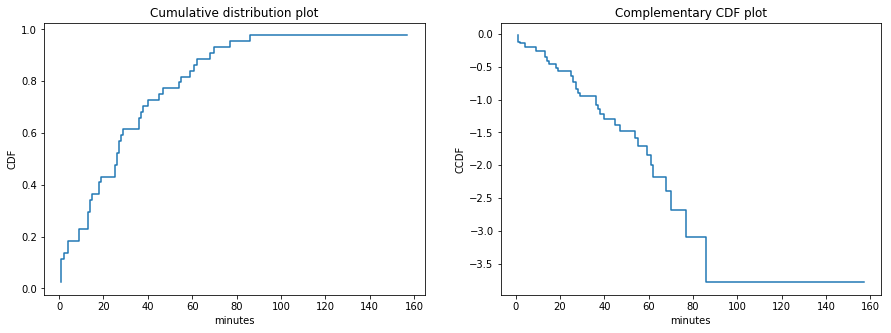

In [52]:
fig,(ax1,ax2) = plt.subplots(ncols=2)
fig.set_size_inches(15,5)

ax1.step(x,y)
ax1.set_title('Cumulative distribution plot')
ax1.set_xlabel('minutes')
ax1.set_ylabel('CDF')

ax2.step(x,log_y)
ax2.set_title('Complementary CDF plot')
ax2.set_xlabel('minutes')
ax2.set_ylabel('CCDF')


The CCDF plot for exponential distribution is a straight line ->

y ≈ e−λx

gives

log y ≈ −λx

So on a log-y scale the CCDF is a straight line with slope −λ.

The parameter, λ, can be interpreted as a rate; that is, the number of events
that occur, on average, in a unit of time. In this example, 44 babies are
born in 24 hours, so the rate is λ = 0:0306 births per minute. The mean of
an exponential distribution is 1/λ, so the mean time between births is 32.7
minutes